In [5]:


%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')



In [6]:
mtcars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

In [7]:
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


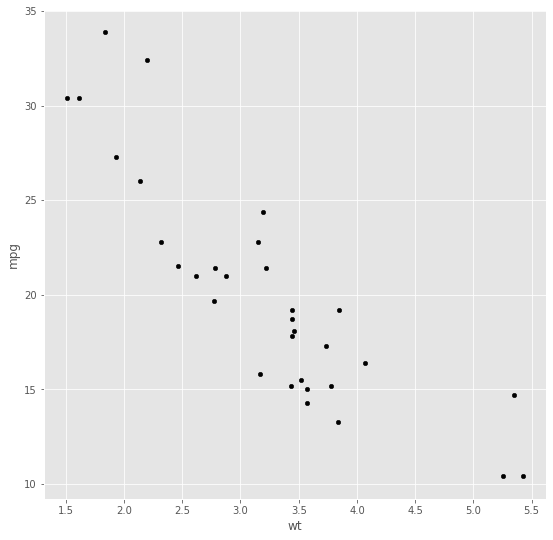

In [8]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [9]:
from sklearn import linear_model

In [11]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [12]:


regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])



0.7528327936582646

In [13]:


train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()



count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [14]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

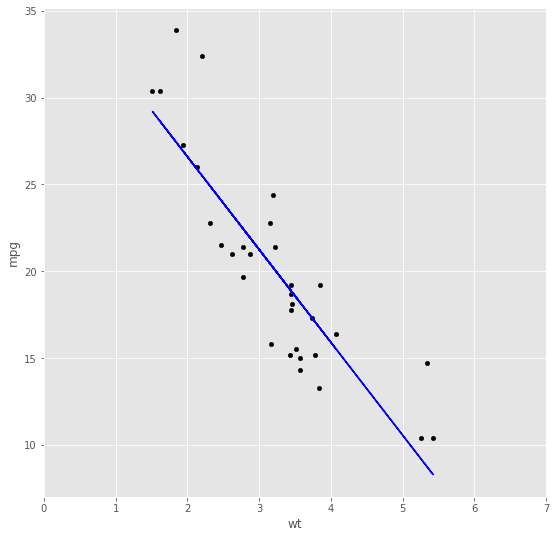

In [15]:


mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");



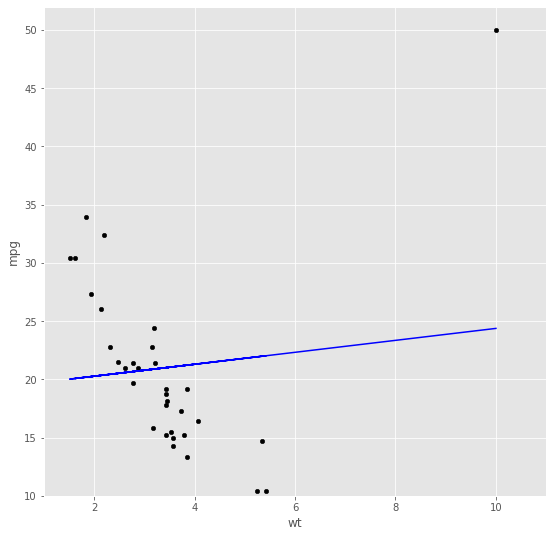

In [16]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

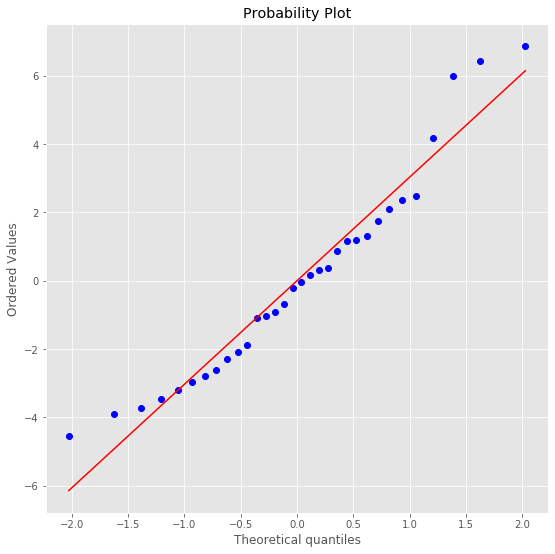

In [17]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);